### Best model selection

This code is used to find best model (pre-parameter tuning) for the dataset.

In [1]:
# Dependencies.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from dataPreprocessing import dataPreprocessing

Using TensorFlow backend.


In [3]:
import fancyimpute
fancyimpute.MICE()

MICE(fill_method='mean', impute_type='col', max_value=None, min_value=None, n_burn_in=10, n_imputations=100, n_nearest_columns=inf, n_pmm_neighbors=5, normalizer=None, verbose=True, visit_sequence='monotone')

In [2]:
# Data loading and preprocessing.
dataset = pd.read_csv('data/application_train.csv', index_col=0)
data_param = pd.read_csv('results/param_preprocess.csv', index_col=0)
data_non_param = dataPreprocessing(parametric_model=False, remove_na_values=True).preprocess(dataset)
data_pseudo_raw = dataPreprocessing(parametric_model=False, remove_na_values=False).preprocess(dataset)

In [3]:
from sklearn.model_selection import train_test_split
def train_test(df):
    '''
    Splits into X, y, then into X_train, X_test, y_train, y_test. INITIALIZES GLOBAL VARIABLES EACH TIME!
    '''
    X = df.drop('TARGET_1', axis=1).values
    y = df['TARGET_1'].values
    global X_train, X_test, y_train, y_test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    return None

In [4]:
def plot_roc_auc(y_test, y_pred):
    '''
    Prints ROC AUC and plots ROC.
    '''
    # ROC AUC.
    from sklearn.metrics import roc_curve, auc

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print("ROC AUC ", roc_auc)

    lw = 2
    plt.plot(false_positive_rate, true_positive_rate, color='darkorange',
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic)
    plt.legend(loc="lower right")
    

### 1. Linear Classifiers: Logistic Regression / Naiive Bayes

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
lr = LogisticRegression()
nb = GaussianNB()

In [6]:
# Fitting.
train_test(data_param)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

ROC AUC  0.5


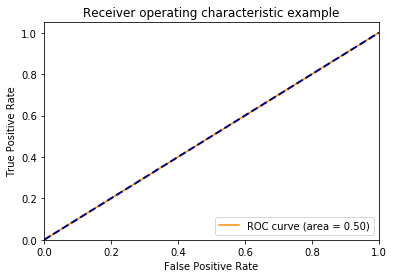

In [7]:
# Logistic regression.
y_pred = lr.predict(X_test)
plot_roc_auc(y_test, y_pred) # Oh god lol.

In [8]:
# Fitting
train_test(data_param)
nb.fit(X_train, y_train)

GaussianNB(priors=None)

ROC AUC  0.499309391621939


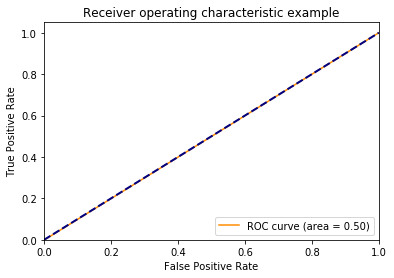

In [9]:
# Naiive bayes.
y_pred = nb.predict(X_test)
plot_roc_auc(y_test, y_pred) # Even worse haha.

### 2. Support Vector Machines

In [10]:
from sklearn.svm import SVC
svm = SVC()

In [ ]:
# Preprocessing and scaling.
train_test(data_param)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Fitting.
svm.fit(X_train, y_train)

In [ ]:
# SVM ROC and ROC AUC.
y_pred = svm.predict(X_test)
plot_roc_auc(y_test, y_pred)

### 3. k-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
# Preprocessing and scaling.
train_test(data_param)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Fitting.
knn.fit(X_train, y_train)

In [ ]:
# k-NN ROC and ROC AUC.
y_pred = knn.predict(X_test)
plot_roc_auc(y_test, y_pred)

### 4. Trees and forests: Decision Trees and Random Forests

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [ ]:
# Fitting.
train_test(data_non_param)
dt.fit(X_train, y_train)

In [ ]:
# Decision trees.
y_pred = dt.predict(X_test)
plot_roc_auc(y_test, y_pred)

In [ ]:
# Fitting.
train_test(data_non_param)
rf.fit(X_train, y_train)

In [ ]:
# Random forest.
y_pred = rf.predict(X_test)
plot_roc_auc(y_test, y_pred)

### 5. Neural Networks: Multi-Layer Perception

In [10]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()

In [11]:
# Fitting.
train_test(data_non_param)
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

ROC AUC  0.5


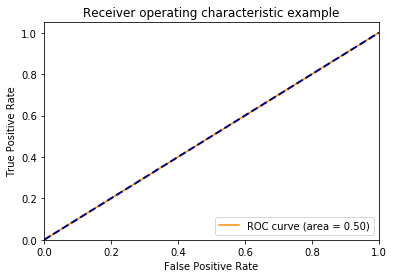

In [12]:
# MLP.
y_pred = mlp.predict(X_test)
plot_roc_auc(y_test, y_pred)

### 6. Deep Learning

In [5]:
# Preprocessing and scaling.
train_test(data_non_param)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

In [13]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(32, input_shape=(259,)))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 32, init = 'uniform', activation = 'relu'))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 32, init = 'uniform', activation = 'relu'))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 32, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

E:\Anaconda3-5.2.0\envs\data_science_old\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32, kernel_initializer="uniform")`
  """
E:\Anaconda3-5.2.0\envs\data_science_old\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32, kernel_initializer="uniform")`
  
E:\Anaconda3-5.2.0\envs\data_science_old\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
E:\Anaconda3-5.2.0\envs\data_science_old\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


ROC AUC  0.5212078572625164


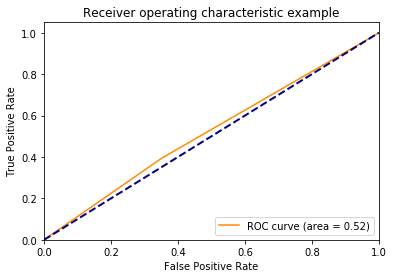

In [14]:
y_pred = classifier.predict(X_test)
plot_roc_auc(y_test, y_pred)

### 6.  Boosting

In [23]:
# Last resort, will use features from kaggle with 0.78 final ROC AUC.
from lightgbm import LGBMClassifier
clf = LGBMClassifier(
            nthread=4,
            n_estimators=10000,
            learning_rate=0.02,
            num_leaves=34,
            colsample_bytree=0.9497036,
            subsample=0.8715623,
            max_depth=8,
            reg_alpha=0.041545473,
            reg_lambda=0.0735294,
            min_split_gain=0.0222415,
            min_child_weight=39.3259775,
            silent=-1,
            verbose=-1, )

clf.fit(X_train, y_train, 
            eval_metric= 'auc', verbose= 100)


LGBMClassifier(boosting_type='gbdt', class_weight=None,
        colsample_bytree=0.9497036, learning_rate=0.02, max_depth=8,
        min_child_samples=20, min_child_weight=39.3259775,
        min_split_gain=0.0222415, n_estimators=10000, n_jobs=-1, nthread=4,
        num_leaves=34, objective=None, random_state=None,
        reg_alpha=0.041545473, reg_lambda=0.0735294, silent=-1,
        subsample=0.8715623, subsample_for_bin=200000, subsample_freq=0,
        verbose=-1)

ROC AUC  0.517760683040226


E:\Anaconda3-5.2.0\envs\data_science_old\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


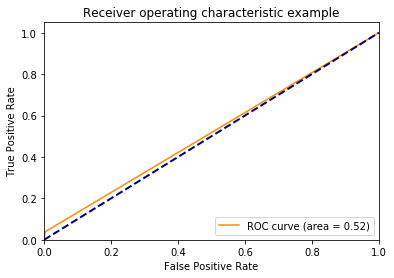

In [27]:
y_pred = clf.predict(X_test)
plot_roc_auc(y_test, y_pred) # I think I fucked up my dataset somehow. Will test